**Abdullah Munir**

## Research question/interests

Briefly describe your research question or interests here.

**How are medical expenditures distributed across various regions and genders?**

I would use my dataset, which contains region, gender, and medical cost data, to solve this research question. I would first clean and preprocess it to guarantee that the data is ready for analysis. I'd investigate the distribution of medical costs across different regions and genders using visualization tools like Facet Grids.For exmaple, I would use a pair plot to compare medical expenditures based on each region for each gender. Using these visualizations, I would look at potential linkages and patterns between region and gender on medical expenditures.

**Is there a link between smoking behaviours and medical costs, and does it differ by area and gender in the United States?**

I will utilize the original dataset comprising data on smoking behaviours, medical bills, and demographic data such as gender and region in the United States to solve this research issue. I'll start by cleaning and analyzing the data to remove missing values or outliers. Additionally, I will add an extra column using the data from the dataset, which will give the number of smokers based on their region and gender. Then, I will use different visualizations like count plots and box plots. For example the distribution of medical expenditures for smokers and nonsmokers would be depicted using various box colours for different genders and locations. to investigate the association between smoking behaviours, medical costs, geography, and gender.

**Is there a relationship between BMI (Body Mass Index) and medical costs, and how does it vary across different regions and genders?**
I would use my dataset, which contains BMI,region, gender, and medical cost data, to solve this research question.I would first clean and preprocess it to guarantee that the data is ready for analysis. I will use different visualizations like scatter plots and violin plots. This will allow me to look at patterns and links between bmi based on different data such as regions, gender and their relation with the medical costs.

**MileStone 1**

We started our project by establishing our project statement and picking a dataset from Kaggle. We built our group and repository after selecting our dataset and gained clearance for our selection.

**MileStone 2**

We introduced our dataset and topic, as well as information on where we received the dataset, its purpose, and how it was gathered. Each group member developed their own Jupyter notebook in which they outlined their research topic and questions and gave some analysis on how to solve the questions. The dataset is on Github.


In [1]:
import pandas as pd
df = pd.read_csv('../data/raw/Medical_Cost.csv')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white",
              font_scale=1.1, 
             )
plt.rc("axes.spines", top=False, right=False)

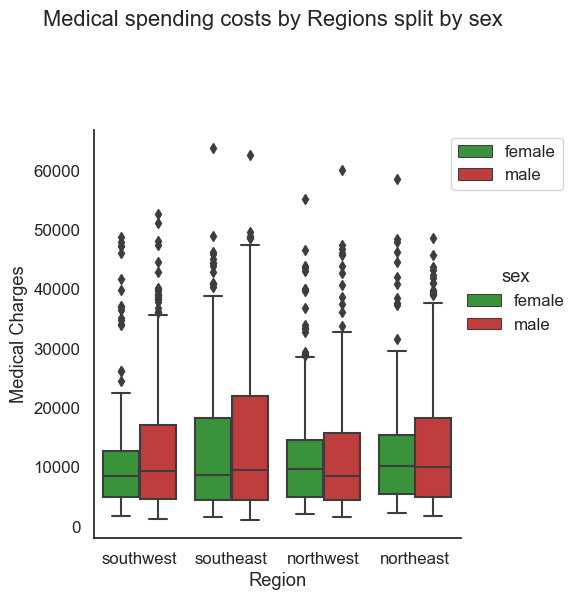

In [3]:
p = sns.color_palette(['tab:green', 'tab:red'])

x = sns.catplot(data=df, x='region', y='charges', hue='sex', kind='box', palette=p)
x.fig.suptitle("Medical spending costs by Regions split by sex", y=1.2)
x.set(xlabel="Region", ylabel="Medical Charges")

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()



Using the seaborn library, this code generates a FacetGrid, which is a method of generating many graphs depending on a 
category variable. In this example, the plots are histograms that depict the distribution of medical spending cases by gender for each location. The code also adds axis labels and a primary title to the plot, as well as a specific colour palette for male and female.

The resulting graphic demonstrates that the distribution of medical expenditure instances varies by area, with some regions having more cases than others. Furthermore, the plot demonstrates that there are gender inequalities in the distribution of medical spending instances. In most of the regions, the number if medical cases are the same 

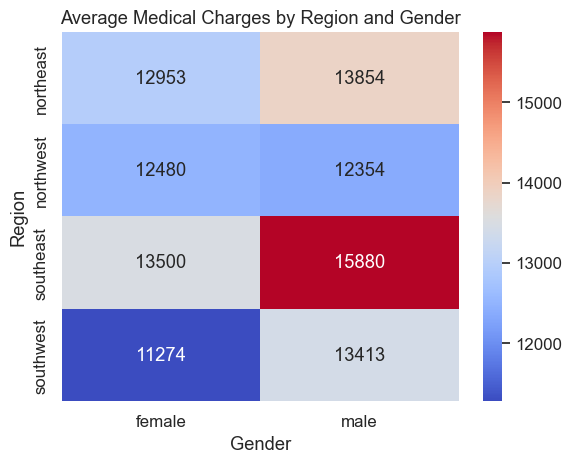

In [4]:
import seaborn as sns

charges_pivot = pd.pivot_table(df, values='charges', index='region', columns='sex', aggfunc='mean')

sns.heatmap(charges_pivot, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Average Medical Charges by Region and Gender')
plt.xlabel('Gender')
plt.ylabel('Region')
plt.show()


Using the seaborn library, this code builds a heatmap that displays the average medical expenses for each area and gender. The heatmap depicts the size of the average medical expenses in each location and for each gender using colour gradients. In each cell in the heatmap, the average medical expenses are also presented.

According to the findings of this graphic, the average medical expenses for males are typically greater than those for females across all locations. guys in the northeast have the highest average medical expenses, followed by guys in the southeast and southwest. Females in the northwest area had the lowest average medical expenses. Overall, the heatmap depicts the disparities in typical medical expenses among regions and genders in the United States.



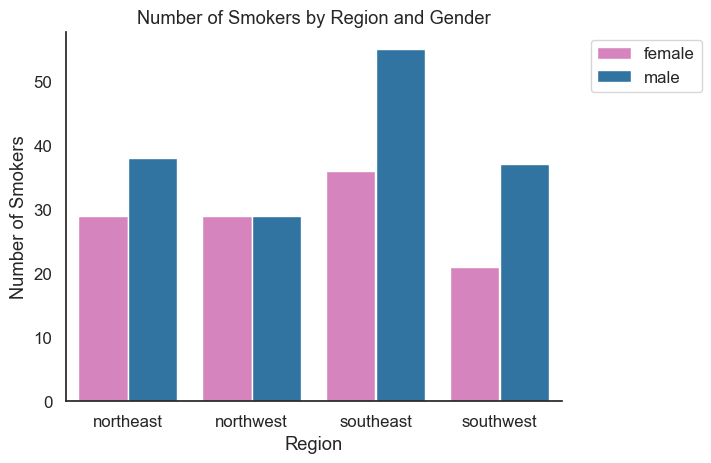

In [5]:
p = sns.color_palette(['tab:pink', 'tab:blue'])
s = df.groupby(['region', 'sex', 'smoker'])['smoker'].count().reset_index(name="count")
s = s[s['smoker'] == 'yes']
sns.barplot(data=s, x='region', y='count', hue='sex', palette=p)
plt.title("Number of Smokers by Region and Gender")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Region")
plt.ylabel("Number of Smokers")
plt.show()


The graph depicts the number of smokers by gender in each location. The data is compiled by counting the number of smokers in each location and gender category. According to the bar plot, the Southeast area has the most smokers, followed by the Northeast, Southwest, and Northwest regions. In addition, male smokers outnumber female smokers in all locations other than the northwest region where they are relatively similar. Generally, this graph gives information about the prevalence of smoking behaviours among people from various countries and genders. It implies that smoking is more widespread among men and those living in the Southeast.

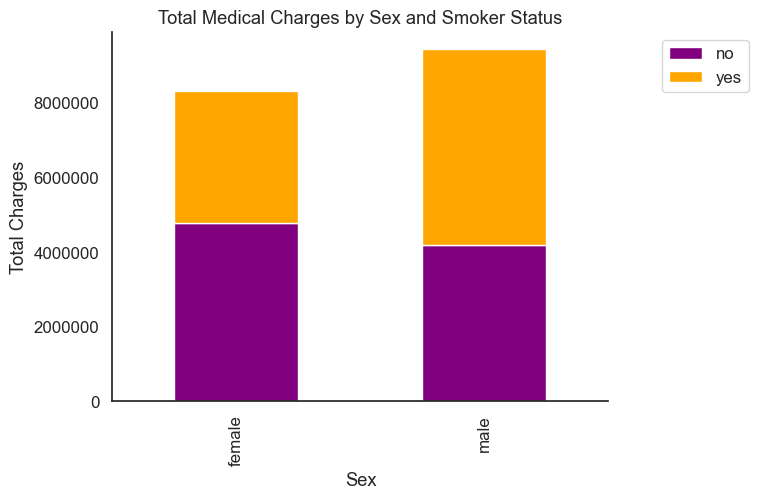

In [6]:
p= pd.pivot_table(data=df, values='charges', index='sex', columns='smoker', aggfunc='sum')
c = ['purple', 'orange']
ax = p.plot(kind='bar', stacked=True,color=c)
plt.title('Total Medical Charges by Sex and Smoker Status')
plt.xlabel('Sex')
plt.ylabel('Total Charges')
ax.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


The graph depicts the overall medical costs spent by individuals based on gender and smoking status. The bar plot is layered, with various colours showing the number of charges levied against smokers and nonsmokers of each gender. Men smokers incur the most overall medical costs, followed by female smokers, male nonsmokers, and female nonsmokers. Smoking has a major influence on medical expenditures, with smokers paying far more than non-smokers. The gender gap in medical expenses is less evident than the difference in smoking status. 
Looking at the bar chart, we can observe that male smokers have greater overall medical expenditures than female smokers. The difference between male and female nonsmokers, on the other hand, is less apparent. This implies that smoking has a far bigger influence on medical bills than gender. It is also worth noting that the overall charges for nonsmokers are significantly cheaper than for smokers, regardless of gender. This emphasises the importance of smoking cessation and preventive initiatives in reducing the burden of medical expenditures, particularly for smokers.

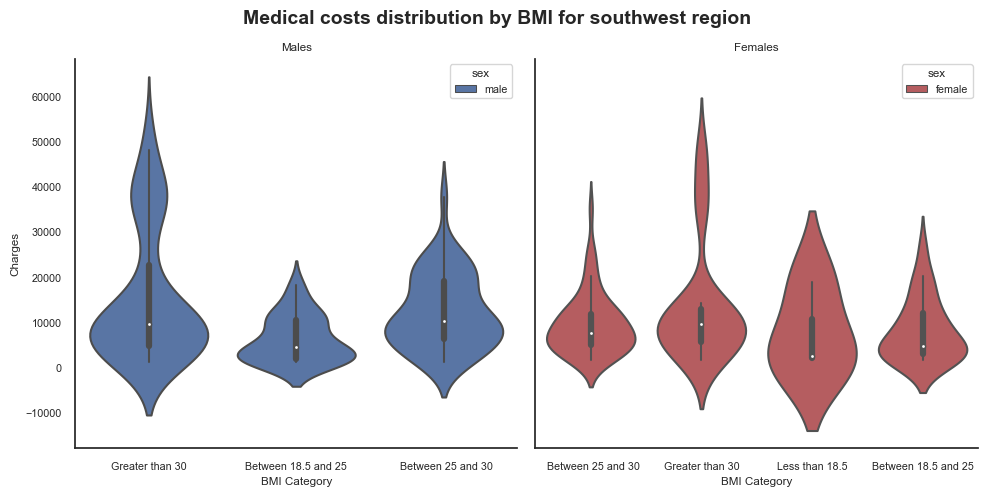

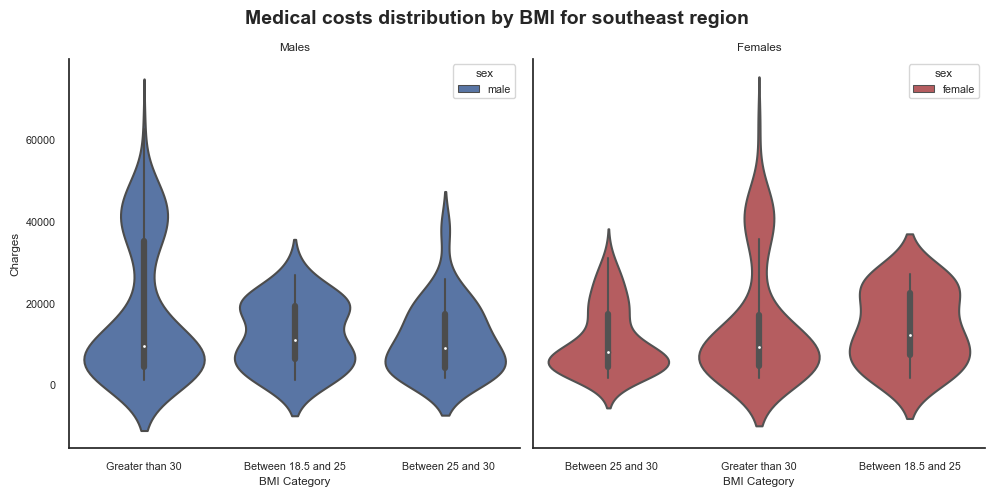

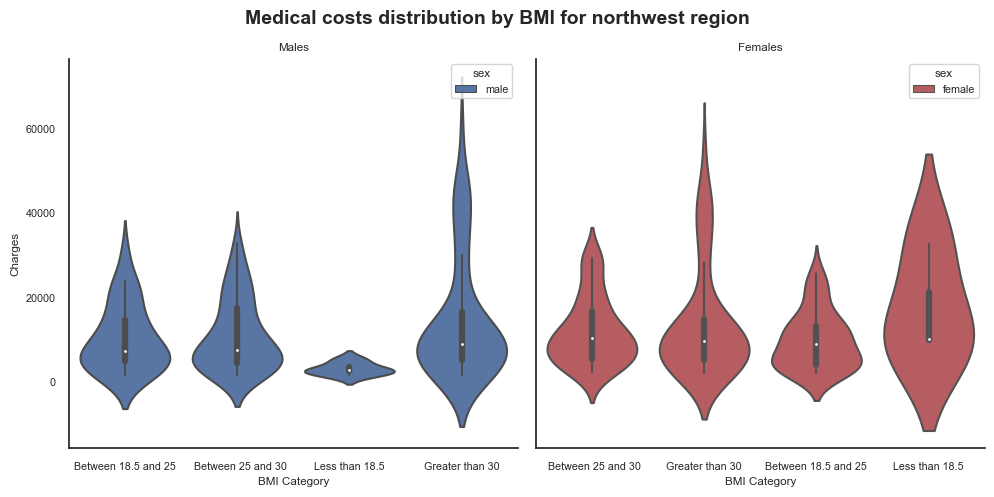

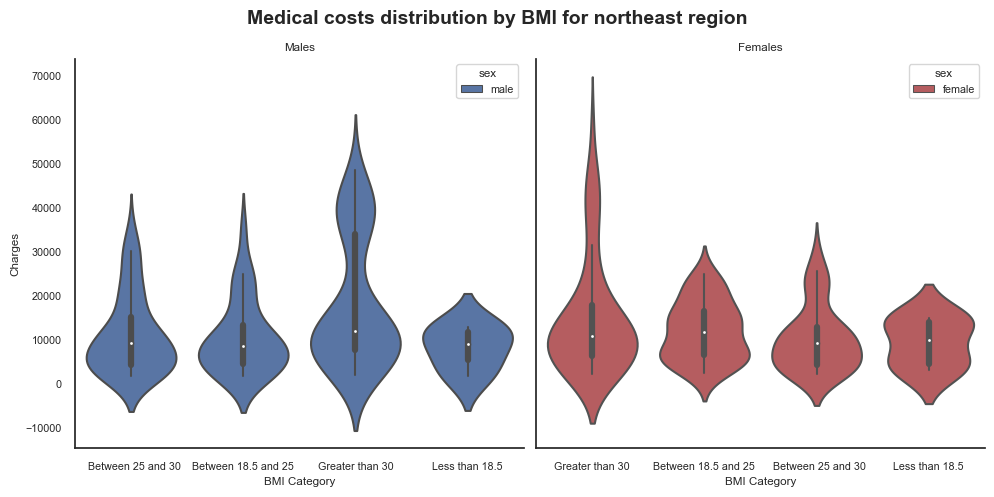

In [7]:
sns.set_theme(style="white",
              font_scale=0.7, 
             )
plt.rc("axes.spines", top=False, right=False)

def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Less than 18.5'
    elif bmi >= 18.5 and bmi < 25:
        return 'Between 18.5 and 25'
    elif bmi >= 25 and bmi < 30:
        return '  Between 25 and 30'
    else:
        return 'Greater than 30'

df['bmi_category'] = df['bmi'].apply(get_bmi_category)

male_data = df[df['sex'] == 'male']
female_data = df[df['sex'] == 'female']

for region in df['region'].unique():
    male_region_data = male_data[male_data['region'] == region]
    female_region_data = female_data[female_data['region'] == region]
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 5))
    fig.suptitle('Medical costs distribution by BMI for {} region'.format(region), fontsize=14, fontweight='bold')
    sns.violinplot(x='bmi_category', y='charges', hue='sex', data=male_region_data, palette=['b', 'g'], ax=ax1)
    ax1.set_title('Males')
    ax1.set_xlabel('BMI Category')
    ax1.set_ylabel('Charges')
    sns.violinplot(x='bmi_category', y='charges', hue='sex', data=female_region_data, palette=['r', 'm'], ax=ax2)
    ax2.set_title('Females')
    ax2.set_xlabel('BMI Category')
    ax2.set_ylabel('')
    plt.tight_layout()
    plt.savefig('violinplot_{}.png'.format(region))
    plt.show()

This code generates violin plots to visualise the distribution of medical expenses for different areas and genders depending on BMI categories. The data is organised first by area, then by gender within each region. The violin plots depict the charge density for each BMI group, with distinct graphs for males and females.
The data indicate that medical expenses varied depending on BMI category and gender. Males in the "Greater than 30" BMI group, for example, have greater medical expenses than females in the same category in the southeast area. Furthermore, females in the "Between 18.5 and 25" BMI group in the northeast have lower charges than males in the same category. Overall, the plots reveal that higher BMI categories have greater medical expenses, and that there are regional and gender variances.


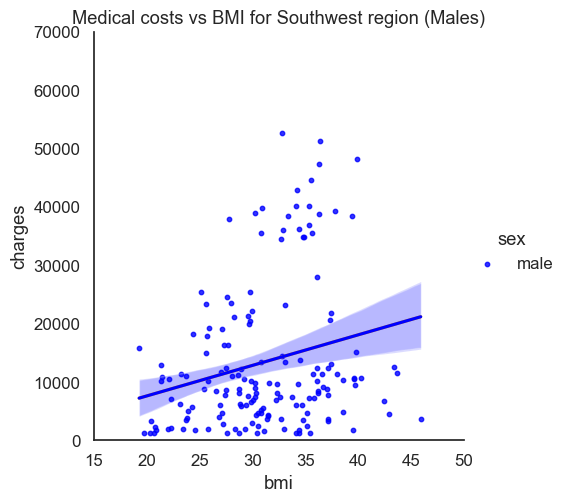

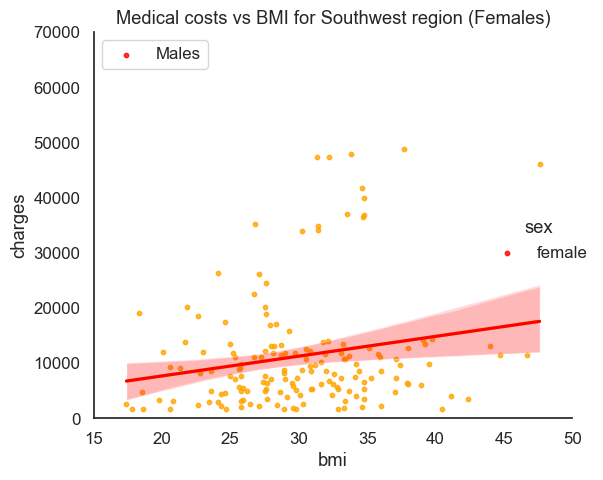

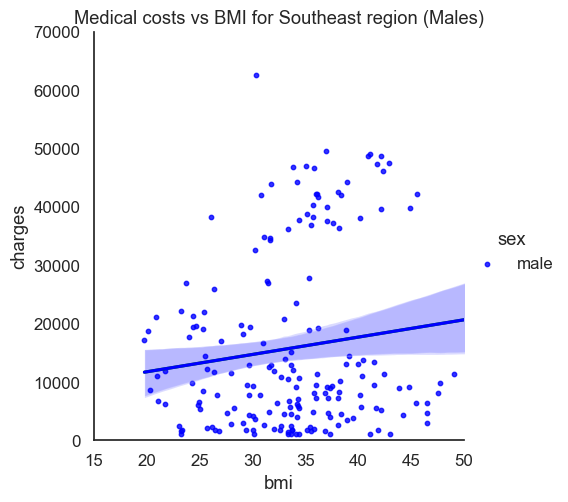

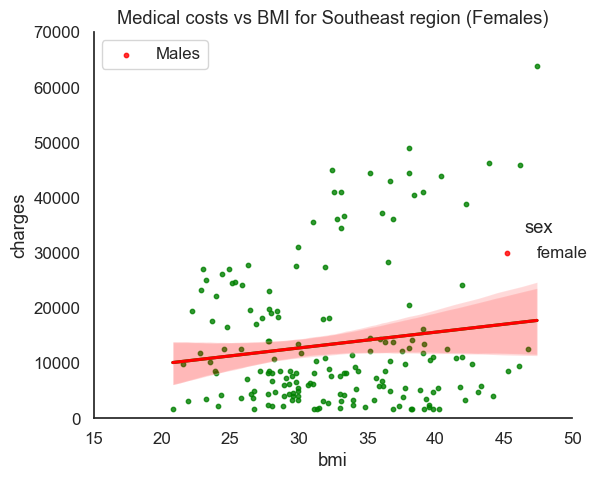

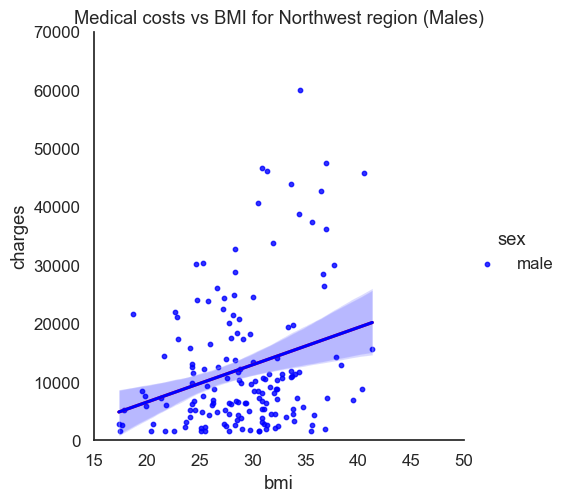

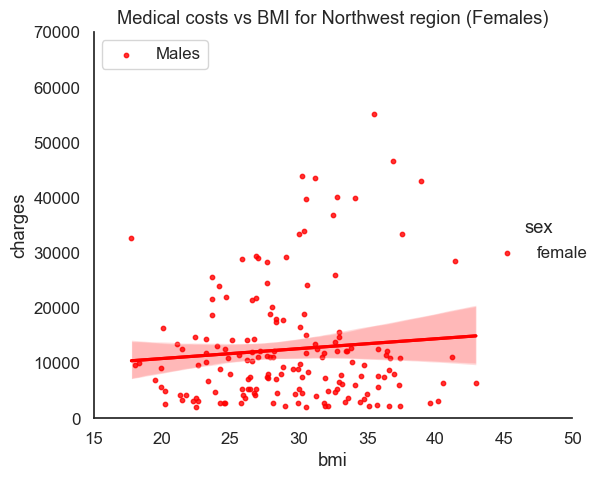

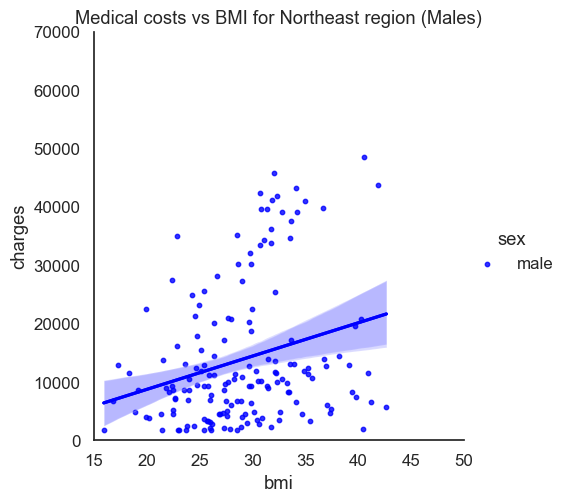

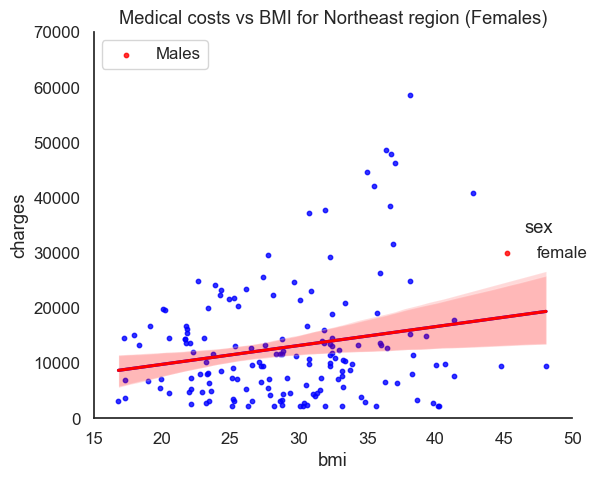

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white",
              font_scale=1.1, 
             )
plt.rc("axes.spines", top=False, right=False)

male_data = df[df['sex'] == 'male']
female_data = df[df['sex'] == 'female']

colors = {'northeast': 'blue', 'southeast': 'green', 'southwest': 'orange', 'northwest': 'red'}

for region in df['region'].unique():
    region_data = df[df['region'] == region]
    male_region_data = male_data[male_data['region'] == region]
    female_region_data = female_data[female_data['region'] == region]
    
    sns.lmplot(x='bmi', y='charges', data=male_region_data, hue='sex', palette={'male': 'blue'}, scatter_kws={'s': 10})
    plt.title('Medical costs vs BMI for {} region (Males)'.format(region.capitalize()))
    plt.xlabel('BMI')
    plt.ylabel('Medical Costs')
    plt.xlim(15, 50)
    plt.ylim(0, 70000)
    
    male_regression = sns.regplot(x='bmi', y='charges', data=male_region_data, color='blue', scatter=False)
    
    sns.lmplot(x='bmi', y='charges', data=female_region_data, hue='sex', palette={'female': 'red'}, scatter_kws={'s': 10})
    plt.title('Medical costs vs BMI for {} region (Females)'.format(region.capitalize()))
    plt.xlabel('BMI')
    plt.ylabel('Medical Costs')
    plt.xlim(15, 50)
    plt.ylim(0, 70000)
    
    female_regression = sns.regplot(x='bmi', y='charges', data=female_region_data, color='red', scatter=False)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    handles = [handles[0]] # update handles to remove second handle
    labels = ['Males', 'Females']
    plt.gca().legend(handles, labels, loc='upper left')
    
    male_regression.lines[0].set_color(colors[region])
    female_regression.lines[0].set_color(colors[region])
    handles[0].set_color(colors[region])
    
    plt.tight_layout()
    plt.show()

This code creates a series of scatter plots and regression lines illustrating the association between BMI and medical expenditures for various areas and genders. The data is divided into male and female subgroups for each region, and separate scatter plots and regression lines are constructed for each subset. The region is represented by the colour of the regression lines and legend markers.

The scatter plots show a positive relationship between BMI and medical costs for both males and females across all areas. According to the regression lines, the link is highest for females in the southeast area, where the slope of the line is steeper than in other regions. This implies that females in the southeast may face greater medical expenses per unit rise in BMI than women in other areas. Furthermore, in most countries, the dispersion of the data points appears to be greater for guys than for females, indicating that medical expenses for males may be more unpredictable and less predictable depending on BMI.

Overall, this visualisation sheds information on the correlations between BMI, medical expenses, gender, and geography, as well as possible disparities between these categories.

**MileStone 3**

The above EDA is the work done in Milestone 3. In MileStone 3 each group member made different EDAs to answer their questions. I used different EDAs such as bar plot, HeatMap,Scatter plot, violin plot, a box and whisker plot and a stacked bar plot.

**MileStone 4**

For milestone 4, we cleaned up our data by dropping null values, duplicate values, checking for outliers. After that I processed my data and then used data wrangling to make my new data easier to understand. After that I created fucntions with method chaining.  

**MileStone 5**

In this Milestone, we created our Tableau Dashboard. Since my data was processed I started making the EDAs in the tableau Dashbaord. After that our whole group recorded a ten minute video in which we explained our different visualizations and what they represent.

## Clean the data
I will clean the data by removing the duplicate and the null values. I also dropped an unused column which is the children column

In [9]:
df = pd.read_csv('../data/raw/Medical_Cost.csv')
print(f"The original dataset: {df.shape[0]} rows, {df.shape[1]} columns")
df = df.drop_duplicates()
print(f"The dataset after removing duplicates: {df.shape[0]} rows, {df.shape[1]} columns")
df = df.dropna()
print(f"The dataset after removing null values: {df.shape[0]} rows, {df.shape[1]} columns")

The original dataset: 1338 rows, 7 columns
The dataset after removing duplicates: 1337 rows, 7 columns
The dataset after removing null values: 1337 rows, 7 columns


#### I will check for outliers 

This code produces a figure with four subplots, each of which displays a boxplot for one of the numerical parameters in the insurance dataset: age, BMI, children, and charges. A boxplot is a graphical depiction of a data summary with five numbers: minimum, first quartile, median, third quartile, and maximum. The box represents the middle 50% of the data (the difference between the first and third quartiles), and the whiskers extend to the lowest and highest values within 1.5 times the interquartile range (the difference between the first and third quartiles). Outliers are values that exceed the whiskers and are plotted as separate points.
This code generates boxplots for each feature, allowing us to quickly see which columns contain outlier values. If we notice individual points beyond the whiskers for the charges feature, we know that column has outlier values. We can observe that the charges and bmi columns has outlier values in this example, with numerous points displayed beyond the whiskers on the right side of the boxplot.

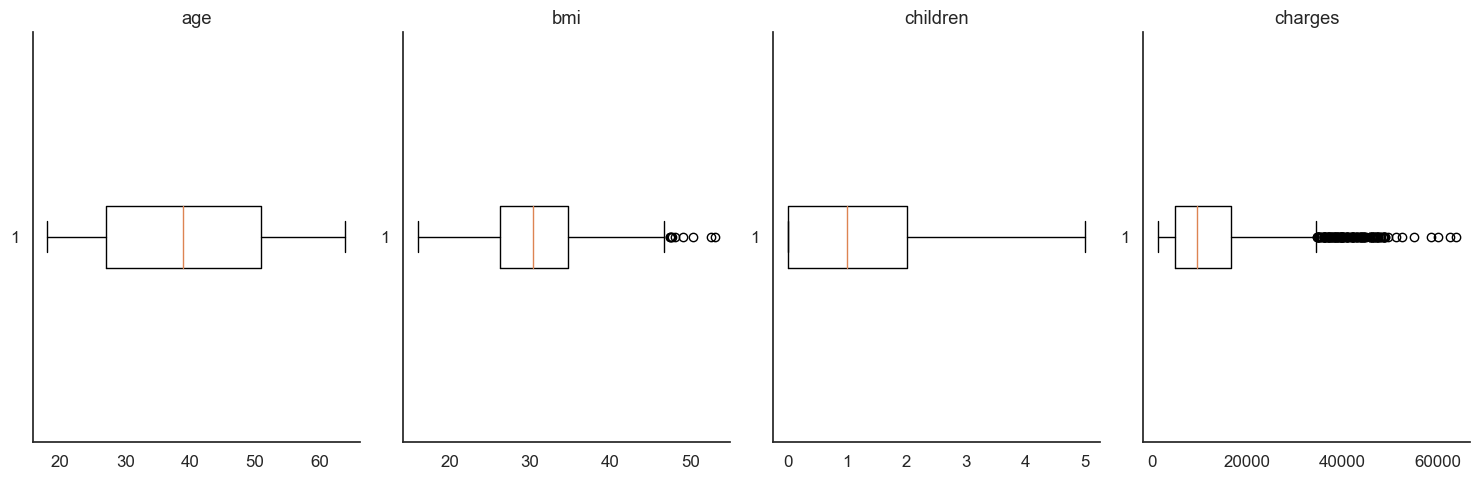

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Create boxplots for each numerical feature in the dataset
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
for i, feature in enumerate(['age', 'bmi', 'children', 'charges']):
    axs[i].boxplot(df[feature], vert=False)
    axs[i].set_title(feature)
plt.tight_layout()
plt.show()


#### I am processing the data
When processing the data I added a new column that return an abbreviated value of the gender and region if the person is a smoker. For example if the person who smokes is a female and she lives in the south west region, the column sill display F-SW. if the person is not a smoker, it will display a value of 0.

In [11]:
region_sex_map = {
    ('yes', 'northwest', 'male'): 'M-NW',
    ('yes', 'northwest', 'female'): 'F-NW',
    ('yes', 'northeast', 'male'): 'M-NE',
    ('yes', 'northeast', 'female'): 'F-NE',
    ('yes', 'southwest', 'male'): 'M-SW',
    ('yes', 'southwest', 'female'): 'F-SW',
    ('yes', 'southeast', 'male'): 'M-SE',
    ('yes', 'southeast', 'female'): 'F-SE',
}

for idx, row in df.iterrows():
    region_sex = region_sex_map.get((row['smoker'], row['region'], row['sex']), 0)
    df.loc[idx, 'region_sex'] = region_sex
    
df = df.drop_duplicates().dropna()
df


,age,sex,bmi,children,smoker,region,charges,region_sex
0,19,female,27.900,0,yes,southwest,16884.92400,F-SW
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


#### Data wrangling


In [12]:
df['smoker'] = df['smoker'].map({'yes': 'y', 'no': 'n'})
df

,age,sex,bmi,children,smoker,region,charges,region_sex
0,19,female,27.900,0,y,southwest,16884.92400,F-SW
1,18,male,33.770,1,n,southeast,1725.55230,0
2,28,male,33.000,3,n,southeast,4449.46200,0
3,33,male,22.705,0,n,northwest,21984.47061,0
4,32,male,28.880,0,n,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,n,northwest,10600.54830,0
1334,18,female,31.920,0,n,northeast,2205.98080,0
1335,18,female,36.850,0,n,southeast,1629.83350,0
1336,21,female,25.800,0,n,southwest,2007.94500,0


**Method Chaining**

In [13]:
import pandas as pd

def load_data(url):
    
    # loaded the data and dealt with the missing data in method chain 1.
    
    df = (
        pd.read_csv(url)
        .drop_duplicates()
        .dropna()
    )

    # Created new column, dropped others, did processing and data warngling in the second method chain 
    
    region_sex_map = {
        ('yes', 'northwest', 'male'): 'M-NW',
        ('yes', 'northwest', 'female'): 'F-NW',
        ('yes', 'northeast', 'male'): 'M-NE',
        ('yes', 'northeast', 'female'): 'F-NE',
        ('yes', 'southwest', 'male'): 'M-SW',
        ('yes', 'southwest', 'female'): 'F-SW',
        ('yes', 'southeast', 'male'): 'M-SE',
        ('yes', 'southeast', 'female'): 'F-SE',
    }

    df = (
        df
        .rename(columns={'smoker': 'is_smoker'})
        .replace({'is_smoker': {'yes': 'y', 'no': 'n'}})
        .assign(region_sex=lambda x: x.apply(lambda row: region_sex_map.get((row['is_smoker'], row['region'], row['sex']), 0), axis=1))
        .drop(columns=['is_smoker'])
    )

    # Returned the cleaned dataframe
    return df


**Conclusion**

I was able to establish a link between smoking habits and BMI with medical expenses in the United States by using Python and data visualisation techniques such as box plots, heatmaps, stacked bar charts, violin plots, and linear regression graphs. I discovered that smoking and having a high BMI were connected to increased medical costs, and that this connection varied by gender and area. My findings emphasise the need of taking these factors into account when researching and estimating medical expenditures.